In [2]:
import pandas as pd
import re

In [82]:
df = pd.read_csv('./sql/view_recipe_energe.csv',sep=',',encoding='utf8')
df

,id,Calorie_correction,Moisture,Crude_protein,Crude_fat,Saturated_fat,Total_carbohydrates,Dietary_fiber,Total_carbohydrate,glucose,...,manganese,VitaminB1,VitaminB2,VitaminB6,VitaminB12,VitaminC,Folic_acid,VitaminA,VitaminD,VitaminE
0,1,109.0,71.7,1.8,0.2,0.2,25.4,2.4,5.1,0.5,...,0.00,0.09,0.04,0.12,0.00,30.3,15.1,10491.0,0.0,0.32
1,3,1101.0,139.6,34.9,35.0,16.7,178.0,26.7,0.6,0.0,...,0.00,0.18,0.26,0.88,0.08,2.6,75.2,87.0,0.0,12.40
2,4,90.0,268.1,5.8,0.5,0.0,23.6,12.1,6.5,1.2,...,0.00,0.14,0.51,0.38,0.13,5.5,84.1,20718.0,0.0,0.42
3,6,22.0,92.6,1.7,0.2,0.2,4.7,1.7,2.2,1.1,...,0.00,0.07,0.06,0.08,0.00,5.0,0.0,0.0,0.0,0.39
4,7,74.0,80.5,2.6,0.2,0.0,15.8,1.3,0.0,0.0,...,0.00,0.08,0.03,0.15,0.00,29.5,11.4,0.0,0.0,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,1603,135.0,75.9,12.7,8.9,3.1,1.6,0.0,0.2,0.2,...,0.03,0.09,0.48,0.11,0.80,0.6,78.6,558.0,84.4,2.22
1288,1604,1368.0,128.5,46.8,69.4,16.4,150.2,14.8,6.9,2.3,...,0.03,0.38,0.70,0.85,1.01,4.3,258.4,563.0,84.4,25.89
1289,1605,400.0,130.5,17.3,27.9,10.2,20.6,0.5,14.8,2.0,...,0.00,0.48,0.18,0.19,0.77,19.7,12.1,175.0,0.0,0.26
1290,1606,283.0,33.3,10.0,6.1,2.9,49.2,4.2,6.7,2.1,...,0.00,0.22,0.07,0.11,0.21,0.0,66.7,5.0,0.0,2.04


In [88]:
df = df.iloc[:,1:]
df

,Calorie_correction,Moisture,Crude_protein,Crude_fat,Saturated_fat,Total_carbohydrates,Dietary_fiber,Total_carbohydrate,glucose,fructose,...,manganese,VitaminB1,VitaminB2,VitaminB6,VitaminB12,VitaminC,Folic_acid,VitaminA,VitaminD,VitaminE
0,109.0,71.7,1.8,0.2,0.2,25.4,2.4,5.1,0.5,0.4,...,0.00,0.09,0.04,0.12,0.00,30.3,15.1,10491.0,0.0,0.32
1,1101.0,139.6,34.9,35.0,16.7,178.0,26.7,0.6,0.0,0.0,...,0.00,0.18,0.26,0.88,0.08,2.6,75.2,87.0,0.0,12.40
2,90.0,268.1,5.8,0.5,0.0,23.6,12.1,6.5,1.2,0.7,...,0.00,0.14,0.51,0.38,0.13,5.5,84.1,20718.0,0.0,0.42
3,22.0,92.6,1.7,0.2,0.2,4.7,1.7,2.2,1.1,1.1,...,0.00,0.07,0.06,0.08,0.00,5.0,0.0,0.0,0.0,0.39
4,74.0,80.5,2.6,0.2,0.0,15.8,1.3,0.0,0.0,0.0,...,0.00,0.08,0.03,0.15,0.00,29.5,11.4,0.0,0.0,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,135.0,75.9,12.7,8.9,3.1,1.6,0.0,0.2,0.2,0.0,...,0.03,0.09,0.48,0.11,0.80,0.6,78.6,558.0,84.4,2.22
1288,1368.0,128.5,46.8,69.4,16.4,150.2,14.8,6.9,2.3,2.9,...,0.03,0.38,0.70,0.85,1.01,4.3,258.4,563.0,84.4,25.89
1289,400.0,130.5,17.3,27.9,10.2,20.6,0.5,14.8,2.0,1.2,...,0.00,0.48,0.18,0.19,0.77,19.7,12.1,175.0,0.0,0.26
1290,283.0,33.3,10.0,6.1,2.9,49.2,4.2,6.7,2.1,2.9,...,0.00,0.22,0.07,0.11,0.21,0.0,66.7,5.0,0.0,2.04


## KMeans on Original Dataset

Text(0, 0.5, 'Inertia')

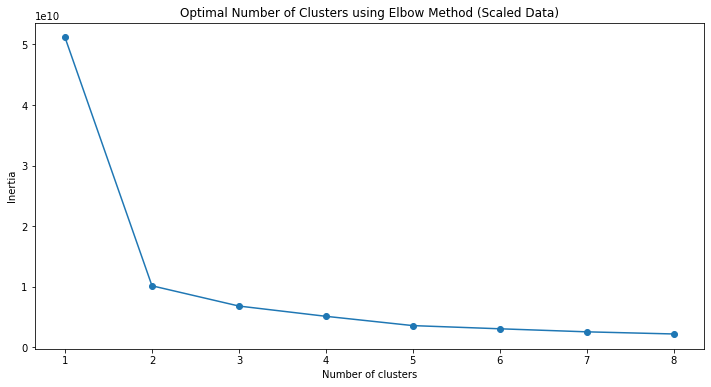

In [89]:
sse = []
k_list = range(1, 9) #手肘法
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append([k, km.inertia_])
    
oca_results_scale = pd.DataFrame({'Cluster': range(1,9), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Optimal Number of Clusters using Elbow Method (Scaled Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [ ]:
# 看來適合分2-4群(2效果最好)(4較符合需人工辨識標籤)

In [90]:
df2 = df.copy()
kmeans_scale = KMeans(n_clusters=4, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(df2)
print('KMeans Scaled Silhouette Score: {}'.format(silhouette_score(df2, kmeans_scale.labels_, metric='euclidean')))
labels_scale = kmeans_scale.labels_
clusters_scale = pd.concat([df2, pd.DataFrame({'cluster_scaled':labels_scale})], axis=1)

KMeans Scaled Silhouette Score: 0.7106502138832556


C:\Users\Tibame_T14\anaconda3\envs\ML_class\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


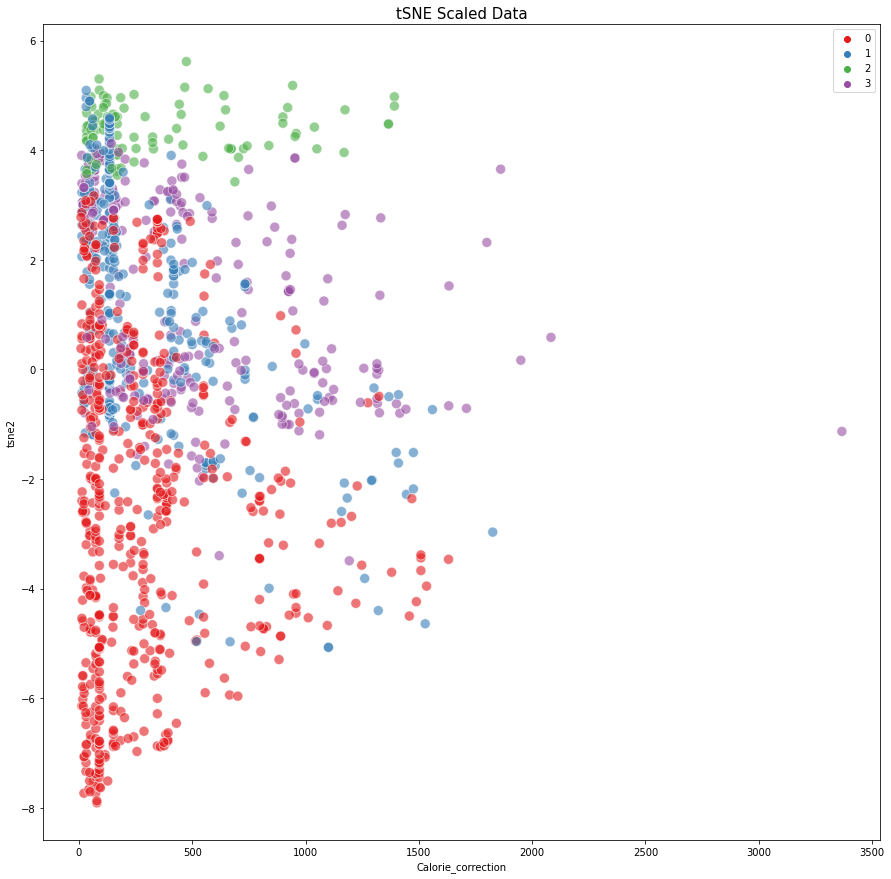

In [91]:
import seaborn as sns
plt.figure(figsize = (15,15))
sns.scatterplot(clusters_scale.iloc[:,0],clusters_tsne_scale.iloc[:,1],hue=labels_tsne_scale, palette='Set1', s=100, alpha=0.6).set_title('tSNE Scaled Data', fontsize=15)
plt.legend()
plt.show()

## Feature Reduction via PCA

In [92]:
pca = PCA(n_components=3)
pca_scale = pca.fit_transform(df)
pca_df_scale = pd.DataFrame(pca_scale, columns=['pc1','pc2','pc3'])
print(pca.explained_variance_ratio_)

[0.8700866  0.11450845 0.0103287 ]


Text(0, 0.5, 'Inertia')

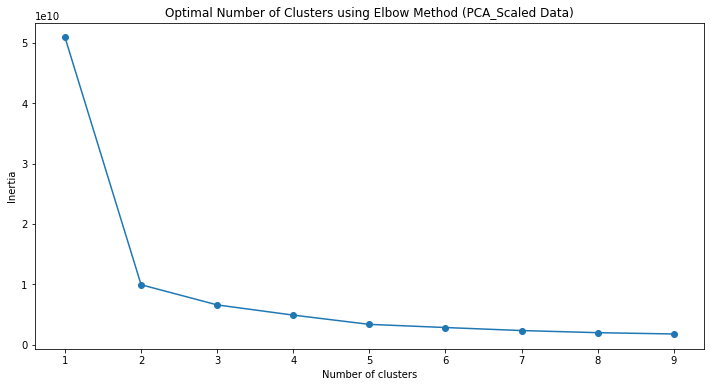

In [93]:
sse = []
k_list = range(1, 10)
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(pca_df_scale)
    sse.append([k, km.inertia_])
    
pca_results_scale = pd.DataFrame({'Cluster': range(1,10), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Optimal Number of Clusters using Elbow Method (PCA_Scaled Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [94]:
kmeans_pca_scale = KMeans(n_clusters=4, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(pca_df_scale)
print('KMeans PCA Scaled Silhouette Score: {}'.format(silhouette_score(pca_df_scale, kmeans_pca_scale.labels_, metric='euclidean')))
labels_pca_scale = kmeans_pca_scale.labels_
clusters_pca_scale = pd.concat([pca_df_scale, pd.DataFrame({'pca_clusters':labels_pca_scale})], axis=1)

KMeans PCA Scaled Silhouette Score: 0.7292747564442107


C:\Users\Tibame_T14\anaconda3\envs\ML_class\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


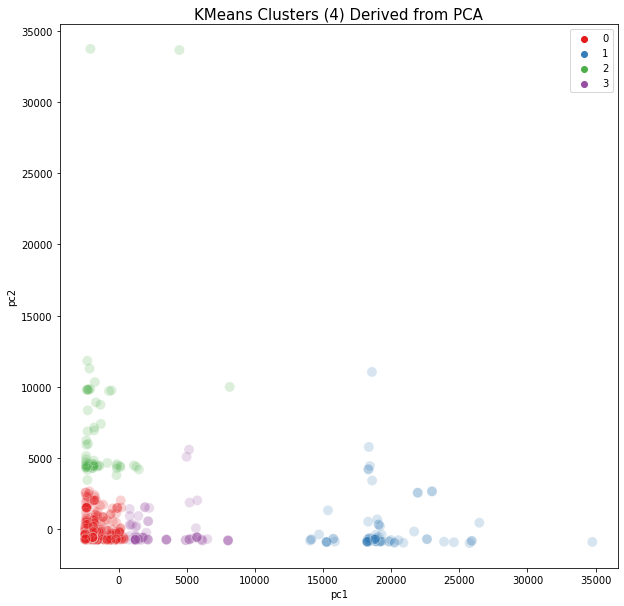

In [95]:
plt.figure(figsize = (10,10))
sns.scatterplot(clusters_pca_scale.iloc[:,0],clusters_pca_scale.iloc[:,1], hue=labels_pca_scale, palette='Set1', s=100, alpha=0.2).set_title('KMeans Clusters (4) Derived from PCA', fontsize=15)
plt.legend()
plt.show()

## Feature Reduction via t-SNE
https://towardsdatascience.com/explaining-k-means-clustering-5298dc47bad6

[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 1292 samples in 0.000s...
[t-SNE] Computed neighbors for 1292 samples in 0.127s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1292
[t-SNE] Computed conditional probabilities for sample 1292 / 1292
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.147205
[t-SNE] KL divergence after 2650 iterations: 0.199000


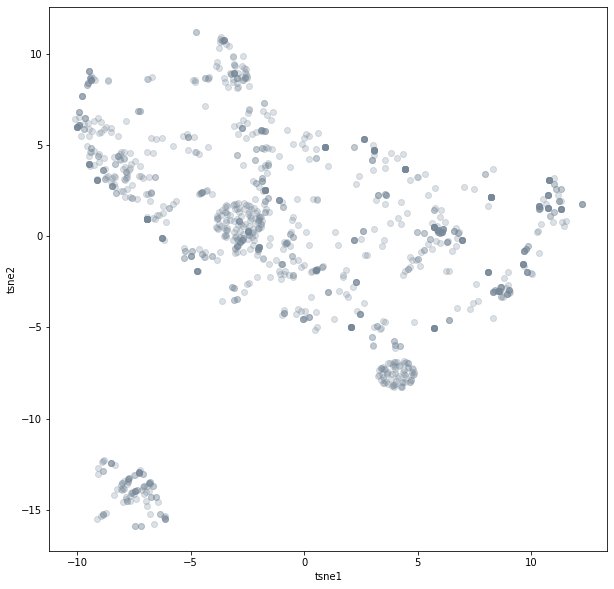

In [96]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, verbose=1, perplexity=80, n_iter=5000, learning_rate=200)
#tsne_scale_results = tsne.fit_transform(data)
tsne_scale_results = tsne.fit_transform(df)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2', 'tsne3'])
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, facecolor='lightslategray')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

Text(0, 0.5, 'Inertia')

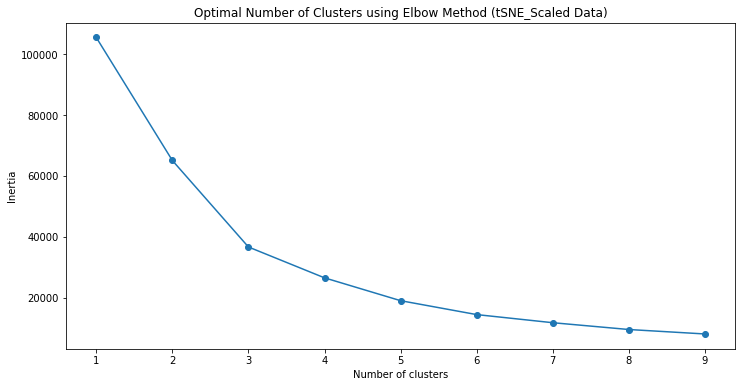

In [97]:
sse = []
k_list = range(1, 10)
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(tsne_df_scale)
    sse.append([k, km.inertia_])
    
tsne_results_scale = pd.DataFrame({'Cluster': range(1,10), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Optimal Number of Clusters using Elbow Method (tSNE_Scaled Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [98]:
from sklearn.metrics import silhouette_score
kmeans_tsne_scale = KMeans(n_clusters=4, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(tsne_df_scale)
print('KMeans tSNE Scaled Silhouette Score: {}'.format(silhouette_score(tsne_df_scale, kmeans_tsne_scale.labels_, metric='euclidean')))
labels_tsne_scale = kmeans_tsne_scale.labels_
clusters_tsne_scale = pd.concat([tsne_df_scale, pd.DataFrame({'tsne_clusters':labels_tsne_scale})], axis=1)

KMeans tSNE Scaled Silhouette Score: 0.45717552304267883


## 儲存結果

In [104]:
#詳細輸出原始資料及其類別
df2 = pd.read_csv('./sql/view_recipe_energe.csv',sep=',',encoding='utf8')

r = pd.concat([df2, pd.Series(kmeans_tsne_scale.labels_, index = df.index)], axis = 1)  #詳細輸出每個樣本對應的類別
r.columns = list(df2.columns) + [u'Cluster_category'] #重命名錶頭
r.to_csv("kmeans_recipe_energe2.csv", index=False) #儲存結果

C:\Users\Tibame_T14\anaconda3\envs\ML_class\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


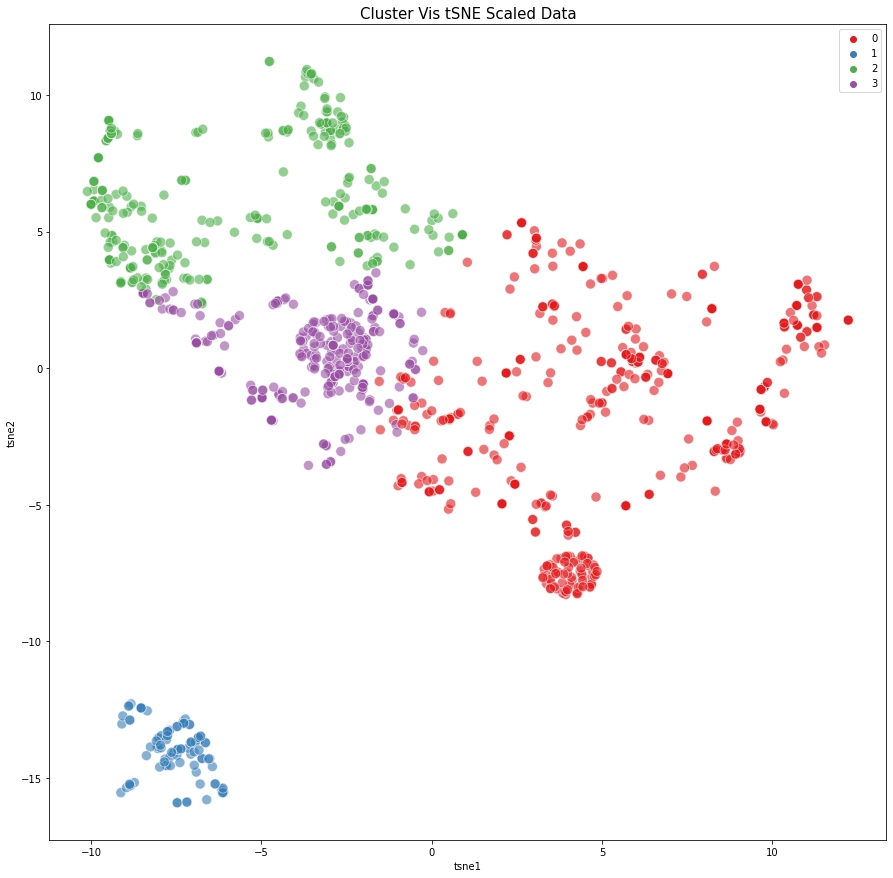

In [100]:
import seaborn as sns
plt.figure(figsize = (15,15))
sns.scatterplot(clusters_tsne_scale.iloc[:,0],clusters_tsne_scale.iloc[:,1],hue=labels_tsne_scale, palette='Set1', s=100, alpha=0.6).set_title('Cluster Vis tSNE Scaled Data', fontsize=15)
plt.legend()
plt.show()

 ## Comparing PCA and t-SNE Derived KMeans Clusters
 ## (比較 PCA 和 t-SNE 每項目 KMeans 分類)

In [101]:
cluster_tsne_profile = pd.merge(df, clusters_tsne_scale['tsne_clusters'], left_index=True, right_index=True )
cluster_pca_profile = pd.merge(df, clusters_pca_scale['pca_clusters'], left_index=True, right_index=True )

C:\Users\Tibame_T14\anaconda3\envs\ML_class\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


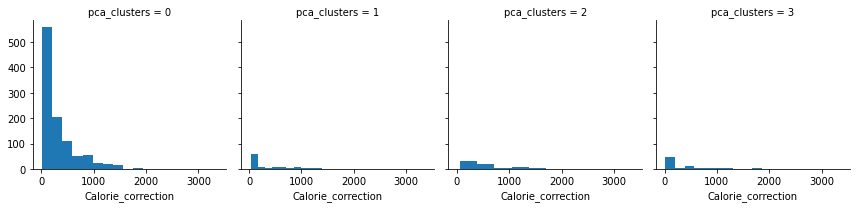

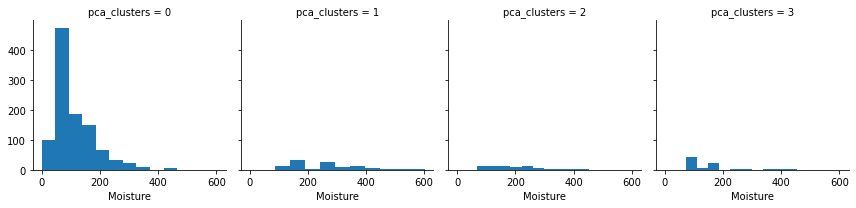

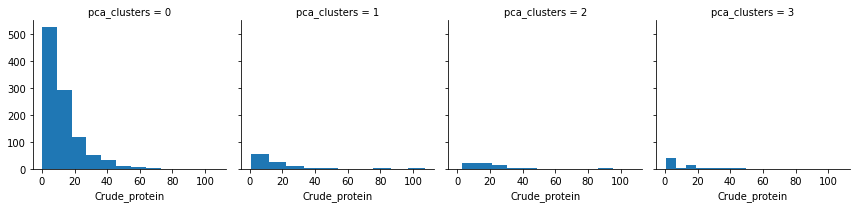

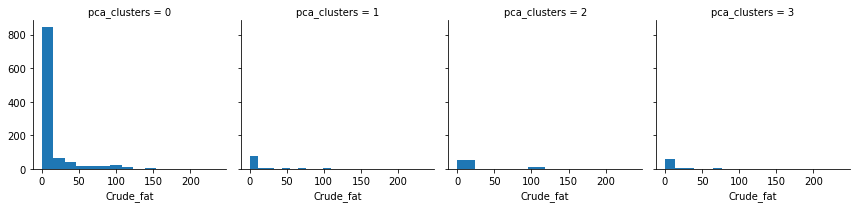

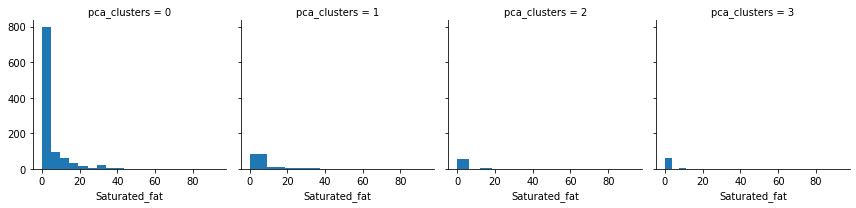

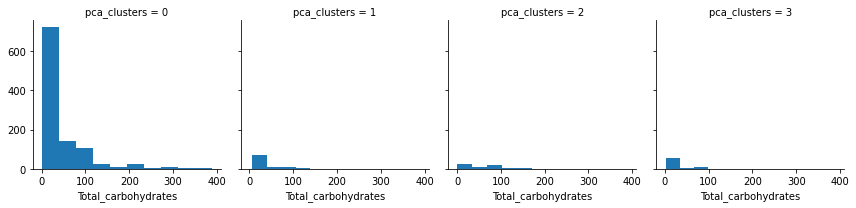

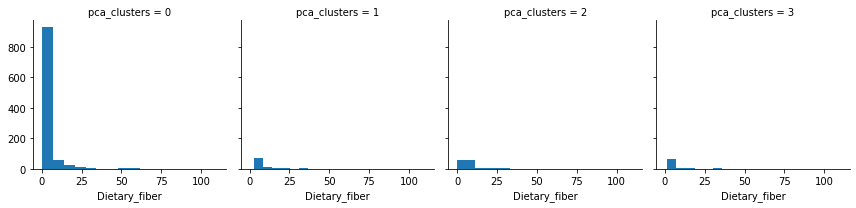

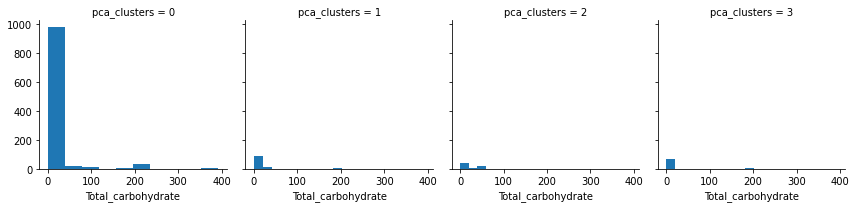

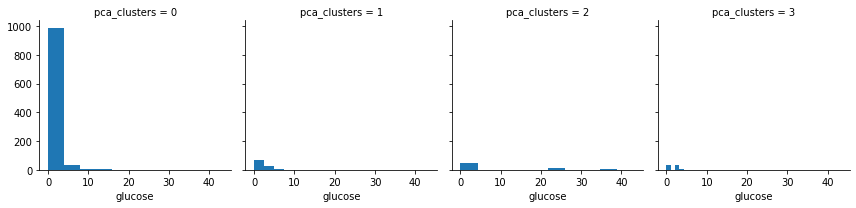

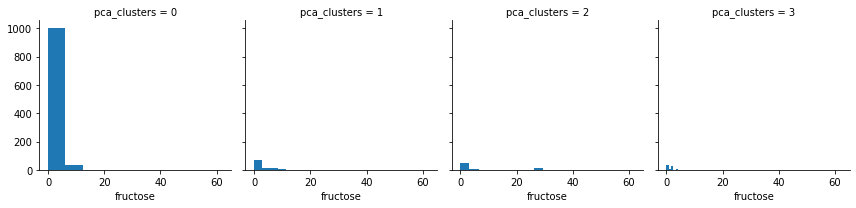

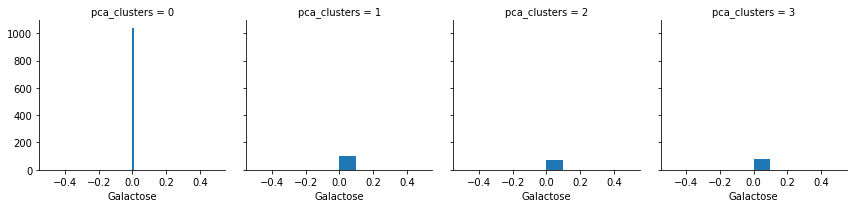

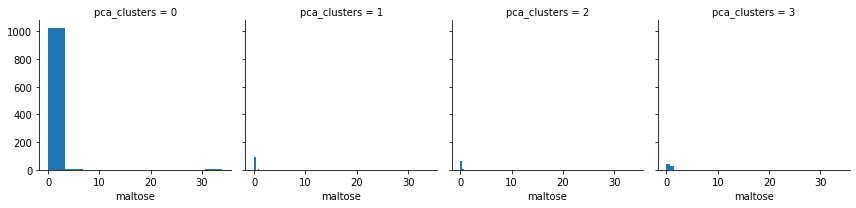

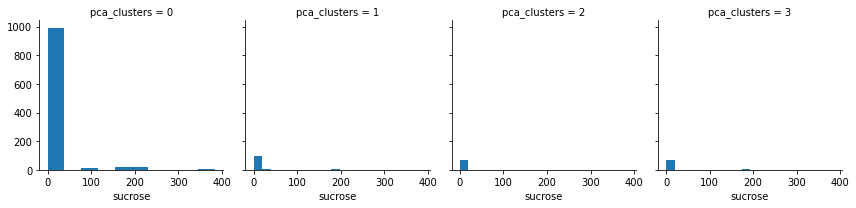

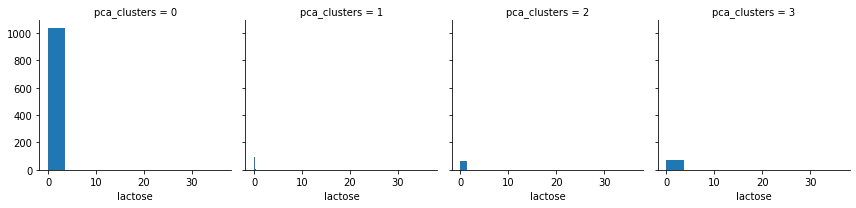

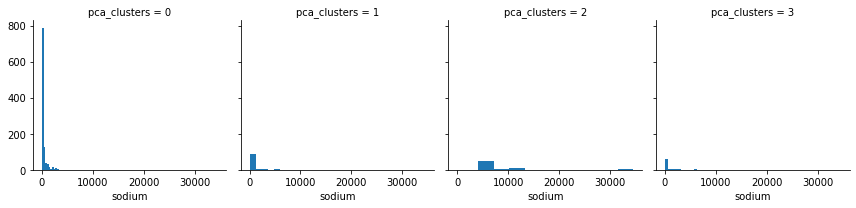

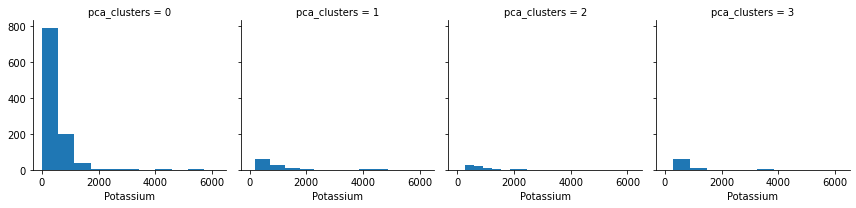

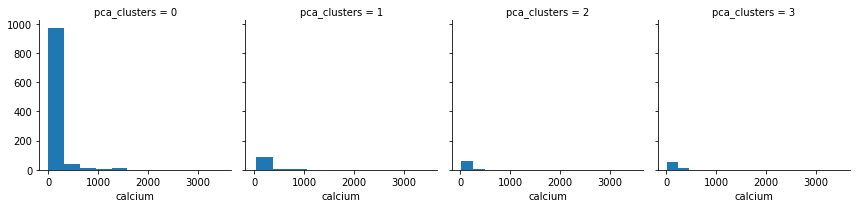

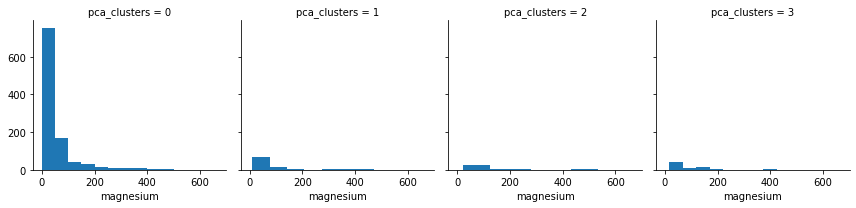

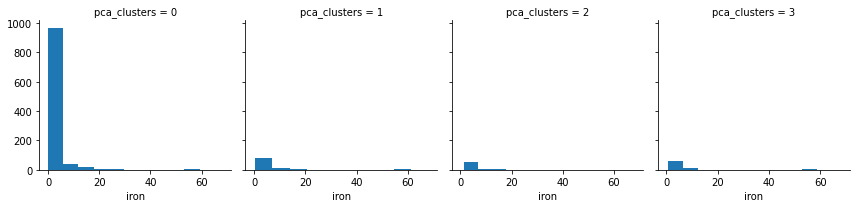

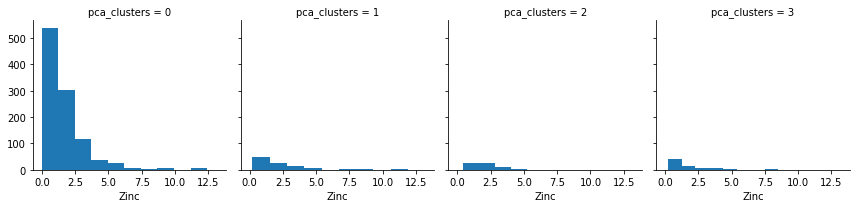

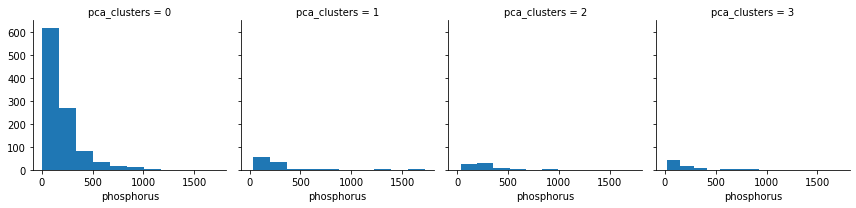

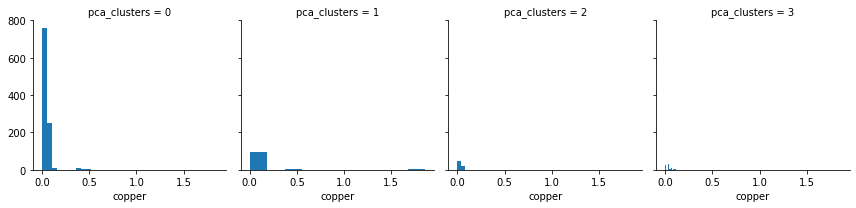

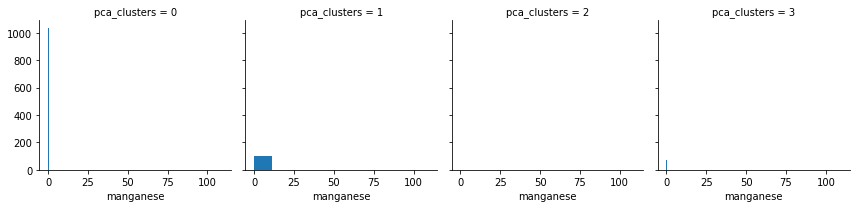

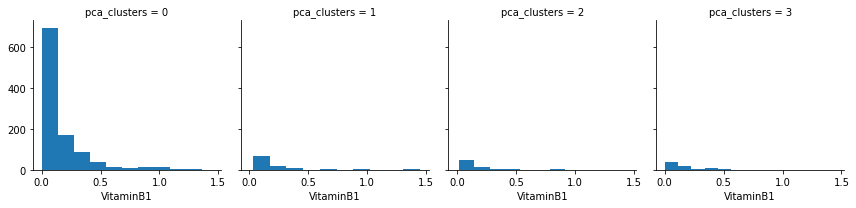

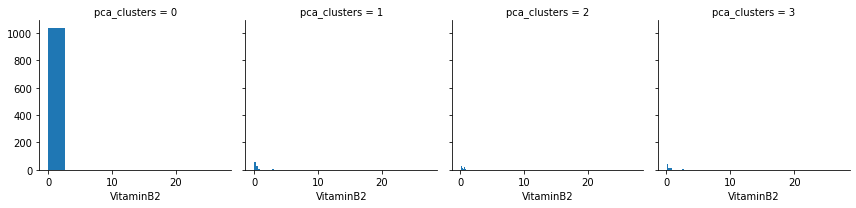

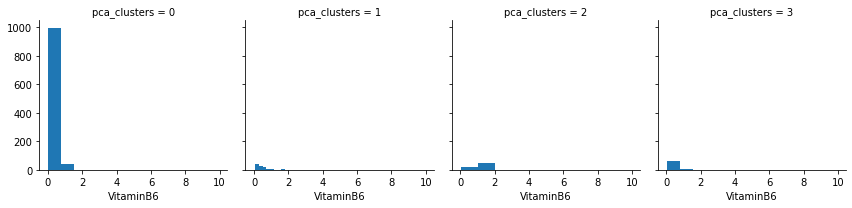

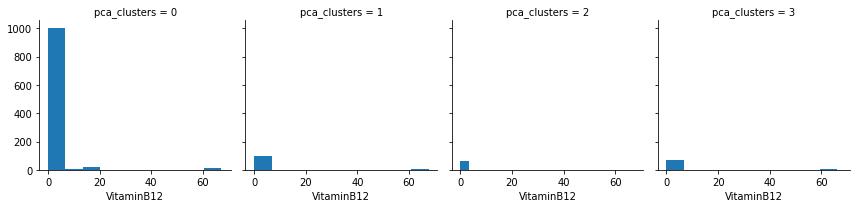

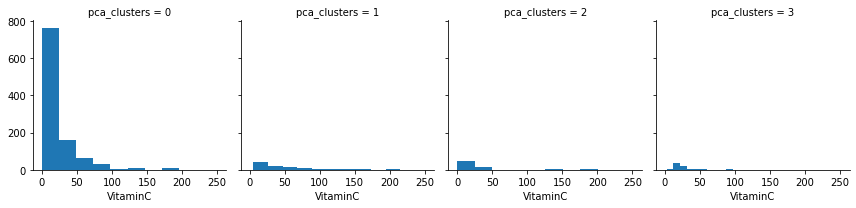

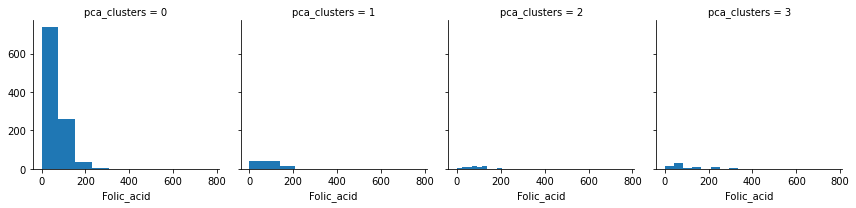

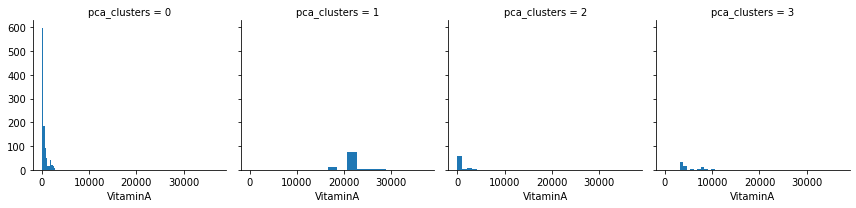

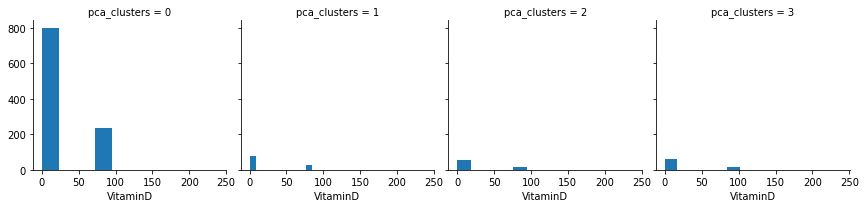

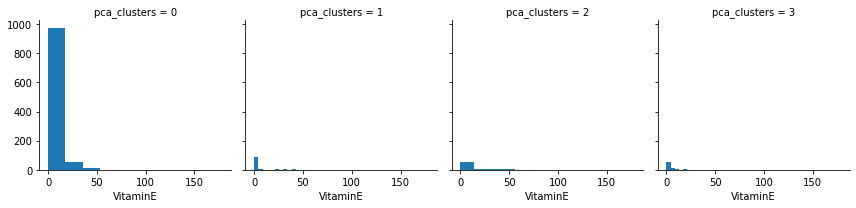

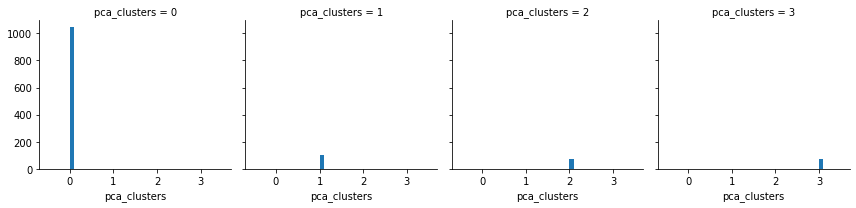

In [102]:
for c in cluster_pca_profile:
    grid = sns.FacetGrid(cluster_pca_profile, col='pca_clusters')
    grid.map(plt.hist, c)

C:\Users\Tibame_T14\anaconda3\envs\ML_class\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


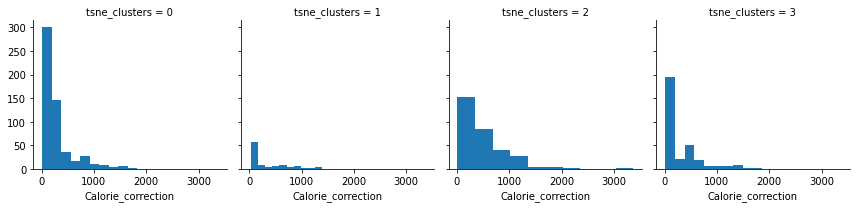

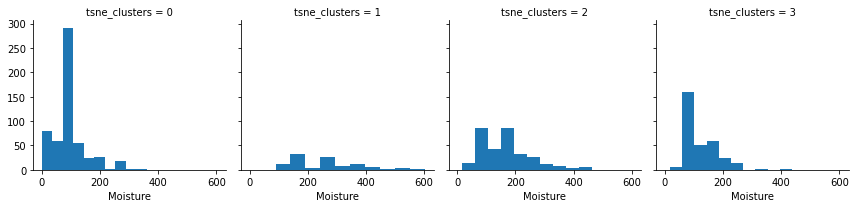

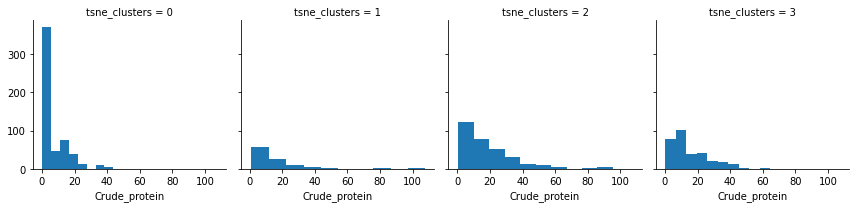

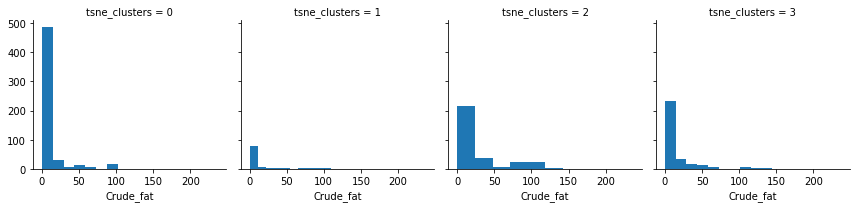

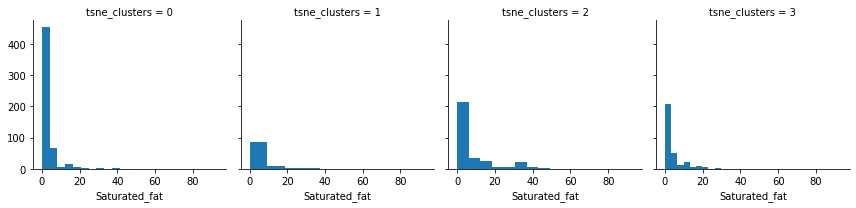

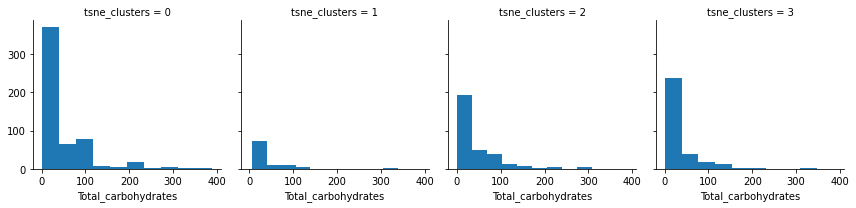

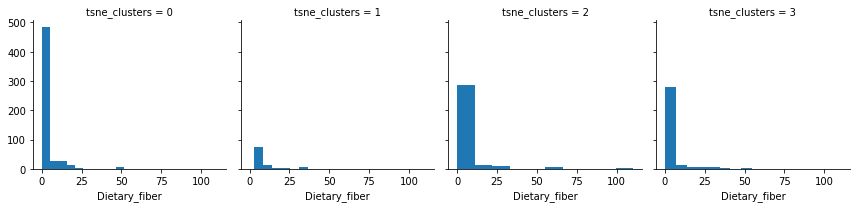

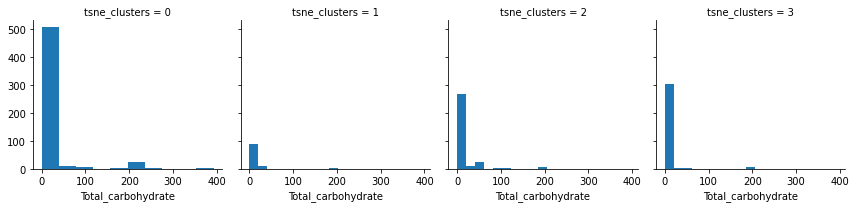

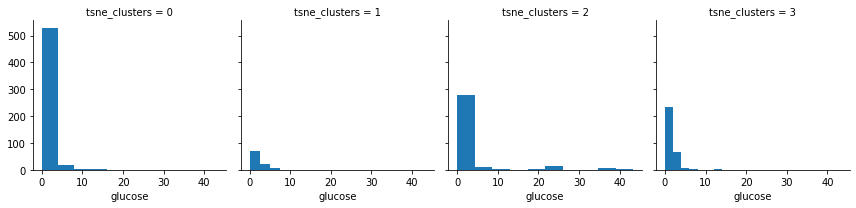

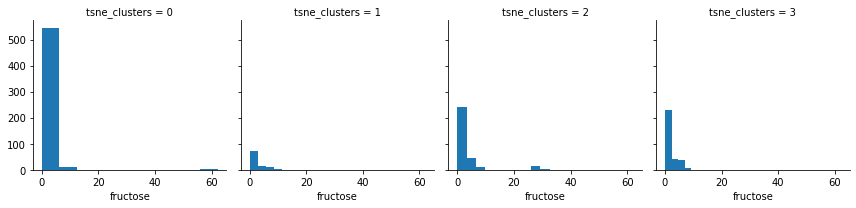

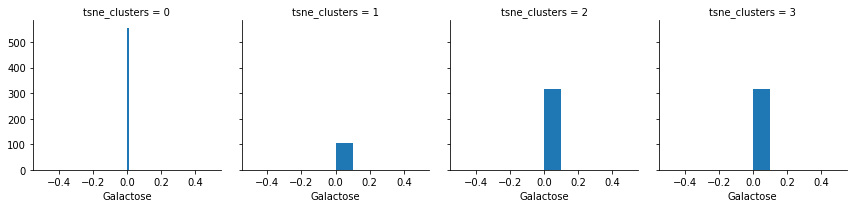

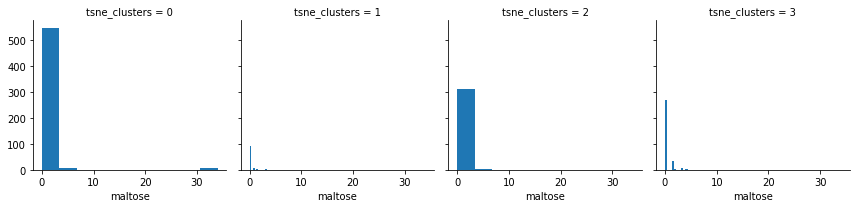

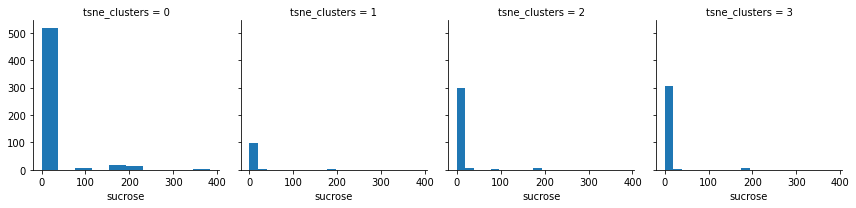

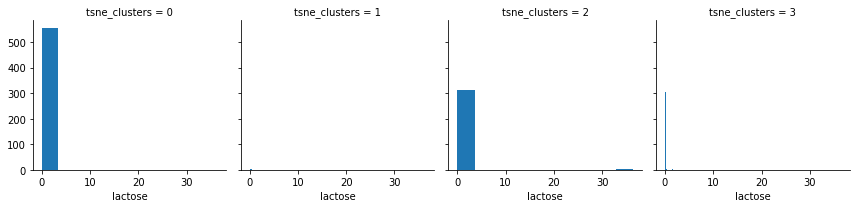

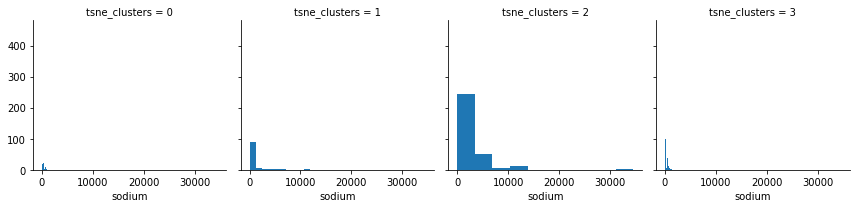

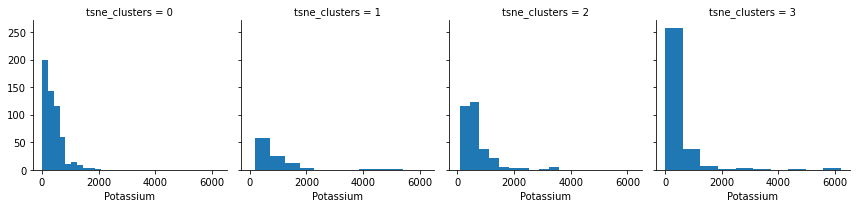

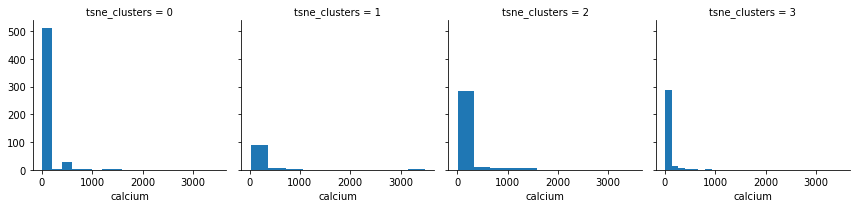

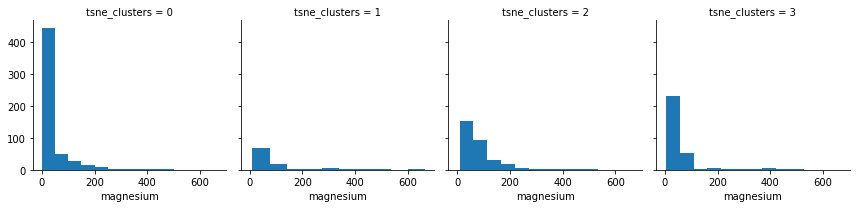

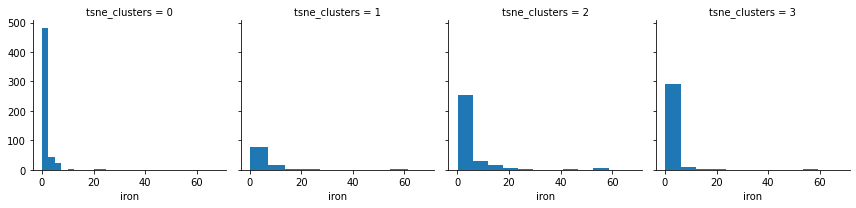

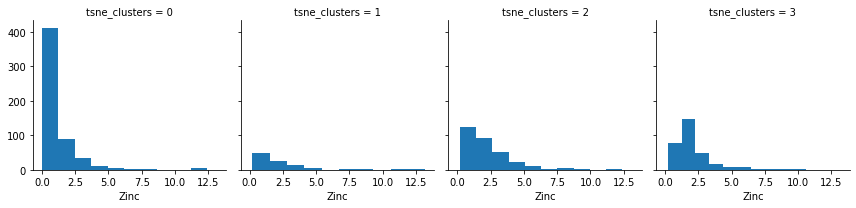

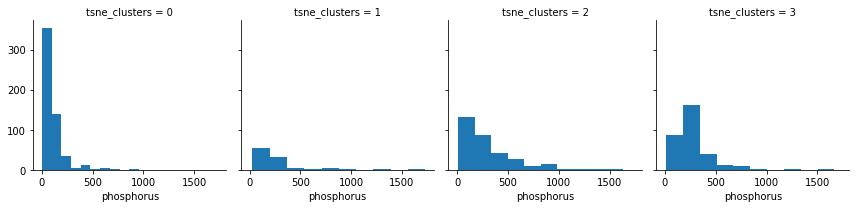

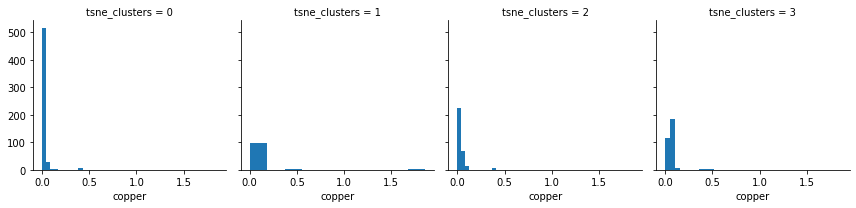

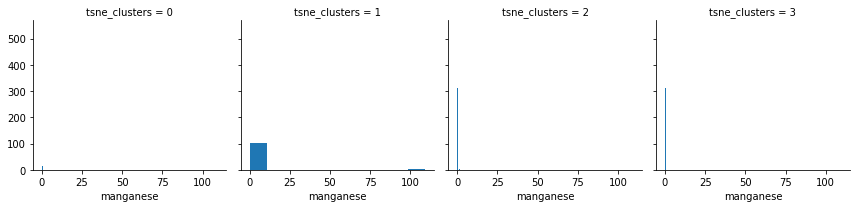

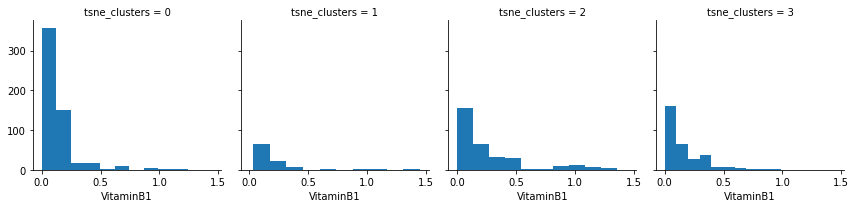

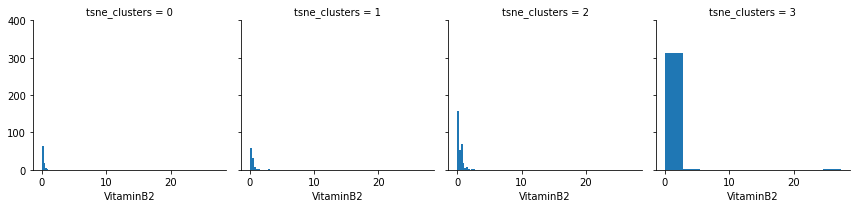

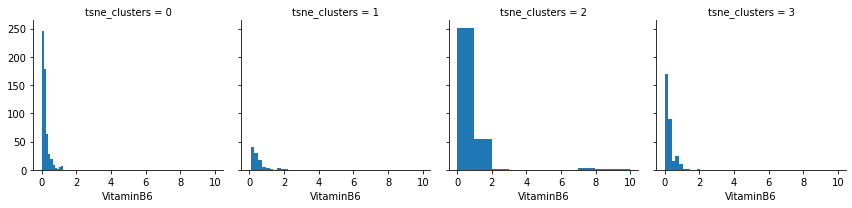

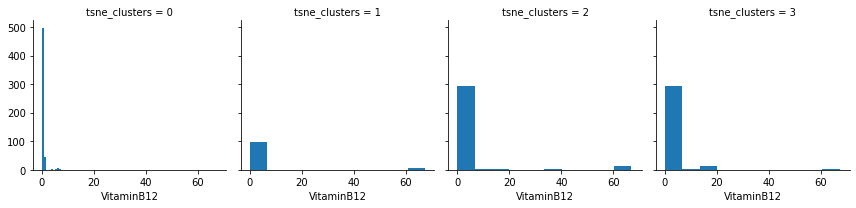

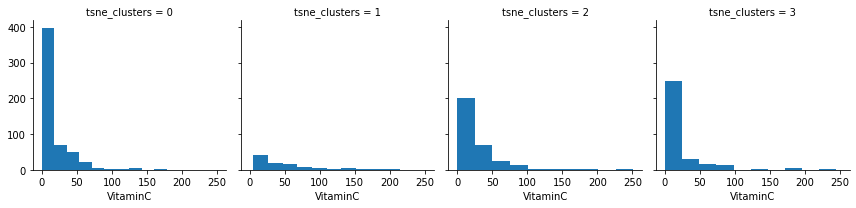

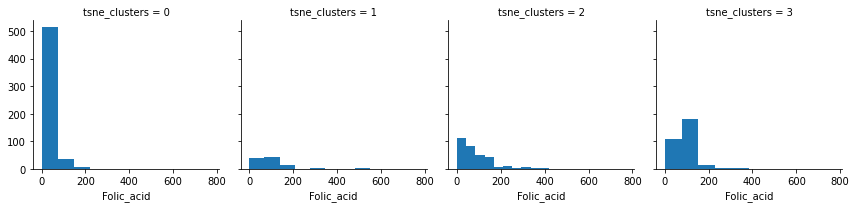

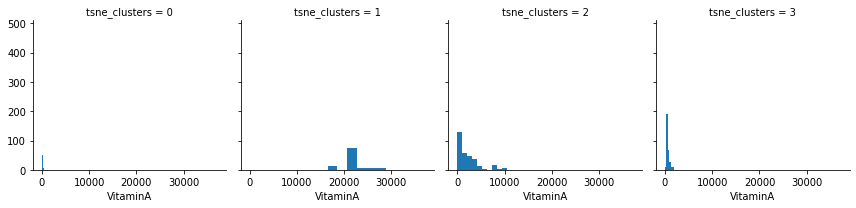

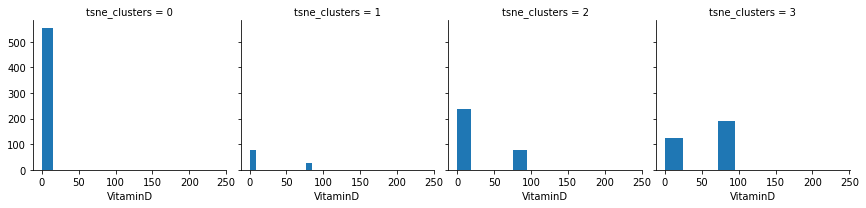

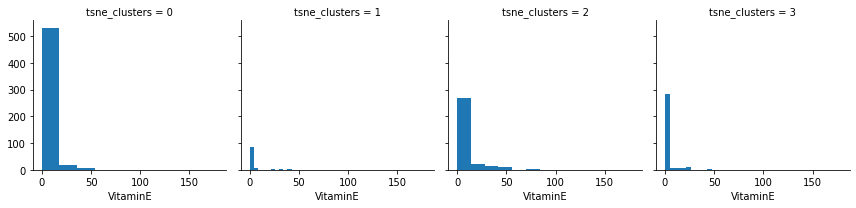

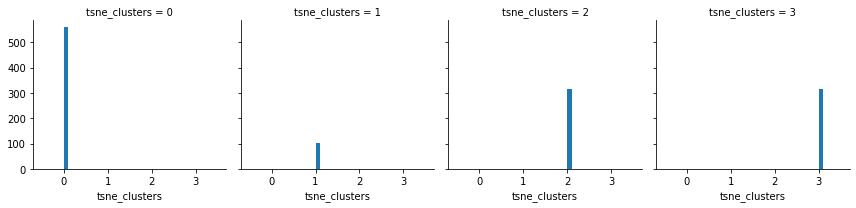

In [103]:
for c in cluster_tsne_profile:
    grid = sns.FacetGrid(cluster_tsne_profile, col='tsne_clusters')
    grid.map(plt.hist, c)